<a href="https://colab.research.google.com/github/tivanello/fase2/blob/main/notebooks/TECH_CHALLENGE_FASE_02_Eduardo_Gil_Tivanello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.
# Dados
Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data

# Requisitos:
• Selecione o período “diário”.
• Baixe um intervalo de pelo menos 2 anos de dados.
• Realize o pré-processamento necessário para utilizar os dados no
modelo.

# Objetivo
Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja: Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

# Entregas Esperadas
Você deverá apresentar ao time de investimentos:
Storytelling Técnico
Apresentação com os seguintes requisitos:
• Aquisição e exploração dos dados;
• Estratégia de engenharia de atributos, caso seja realizado (por exemplo: variações, médias móveis, etc)
• Preparação da base para previsão (definição de target, janela de tempo, etc.);
• Escolha e justificativa do modelo utilizado;
• Resultados e análise de métricas que garantem que o modelo está confiável;

# Justificativa Técnica
Explique claramente:
• Por que você escolheu o(s) modelo(s) utilizados (ex: árvores, regressão logística, LSTM, etc.);
• Como tratou a natureza sequencial dos dados (ex: janelas deslizantes, features lagged);
• Quais os trade-offs entre acuracidade e overfitting.

#Quais documentos devo subir na plataforma? As entregas deverão conter necessariamente:
• Uma pasta zip contendo todos os arquivos do projeto, ou um link para o repositório do GitHub com seu projeto.
• Apresentação do storytelling. Pode ser em PPT, PDF ou ferramentas da sua preferência, como o CANVAS, por exemplo.
• Vídeo de no máximo 5 (cinco) minutos, com uma visão gerencial, explicando como interpretar os resultados obtidos. Note que é necessário que todos os membros do grupo apareçam no vídeo.

**Dica: Utilize o maior intervalo de tempo possível para atingir maior  acuracidade no modelo preditivo.**

Lembre-se que você poderá apresentar o desenvolvimento do seu projeto durante as lives e grupos de estudo com os(as) docentes. Essas são ótimas oportunidades para discutir sobre as dificuldades encontradas, além de pegar dicas valiosas com especialistas e colegas de turma. Não se esqueça que isso é um entregável obrigatório! Se atente para o prazo de entrega até o final da fase.

## **Importação dos arquivos.**

 tentei importar toda a série histórica, à partir de 01/08/1994,  porém o arquivo vinha apenas até 10/10/2014. Como solução realizei a importação de  dois arquivos e realizada junção dos dois nas linhas de comando abaixo. Iremos trabalhar com o arquivo com a série hitórica de 01/08/1994 até 01/08/2025

In [3]:
import os
import pandas as pd

# 1) Clona o repositório (uma vez por sessão)
REPO_URL = "https://github.com/tivanello/fase2.git"
PASTA_REPO = "/content/fase2"

if not os.path.exists(PASTA_REPO):
    !git clone {REPO_URL} {PASTA_REPO}

# 2) Caminhos dentro do repo (exemplo: data/raw)
arquivo1 = f"{PASTA_REPO}/data/raw/Dados Históricos - Ibovespa 11-10-2014 01-08-2025.csv"
arquivo2 = f"{PASTA_REPO}/data/raw/Dados Históricos - Ibovespa 1994 10-10-2014.csv"

# 3) Carrega e unifica
df1 = pd.read_csv(arquivo1, thousands='.', decimal=',')
df2 = pd.read_csv(arquivo2, thousands='.', decimal=',')

df_ibovespa_baixado = pd.concat([df1, df2], ignore_index=True)
df_ibovespa_baixado.head()


Cloning into '/content/fase2'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 40 (delta 15), reused 9 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 2.71 MiB | 7.73 MiB/s, done.
Resolving deltas: 100% (15/15), done.


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


In [4]:
# Cria uma cópia para trabalhar e não precisar baixar todo tempo
df_ibovespa = df_ibovespa_baixado.copy()
df_ibovespa.head()


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


In [5]:
# Verifica a quantidade de linhas e colunas
linhas, colunas = df_ibovespa.shape
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 7679
Colunas: 7


In [6]:
# Verifica o nome das colunas
for c in df_ibovespa.columns:
    print(c)


Data
Último
Abertura
Máxima
Mínima
Vol.
Var%


Alterar os nomes das colunas retirando o maiusculo e acentuação e Vol. para volume e Var% para variacao. Será necessário instalar a biblioteca unicode ( biblioteca Python que remove acentos e caracteres especiais, convertendo textos para versões ASCII simples)


In [7]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 15.7 MB/s eta 0:00:00


In [8]:
import unidecode

# Renomeia colunas: remove acentos e converte para minúsculas
df_ibovespa.columns = [unidecode.unidecode(col).lower().replace('vol.', 'volume').replace('var%', 'variacao') for col in df_ibovespa.columns]

# Visualiza o novo nome das colunas
print(df_ibovespa.columns)

Index(['data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], dtype='object')


In [9]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


In [10]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data      7679 non-null   int64 
 1   ultimo    7679 non-null   int64 
 2   abertura  7679 non-null   int64 
 3   maxima    7679 non-null   int64 
 4   minima    7679 non-null   int64 
 5   volume    7678 non-null   object
 6   variacao  7679 non-null   object
dtypes: int64(5), object(2)
memory usage: 420.1+ KB


Analisando o arquivo notei que a data não esta no formato correto, sendo necessária a sua formação


In [11]:
import pandas as pd

# Converte DDMMAAAA -> datetime (bom para ML)
df_ibovespa["data"] = pd.to_datetime(
    df_ibovespa["data"].astype(str).str.zfill(8),
    format="%d%m%Y",
    errors="coerce"
)

# Ordena por data
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)



Verificando a formatação de cada coluna e se existem campos vazios ou nulos

In [12]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152,4201,4223,4091,"5,39B","-1,17%"
1,1994-08-02,4311,4152,4311,4152,"6,63B","3,83%"
2,1994-08-03,4392,4311,4426,4275,"6,88B","1,88%"
3,1994-08-04,4355,4392,4406,4321,"5,67B","-0,84%"
4,1994-08-05,4470,4355,4476,4329,"5,14B","2,64%"


In [13]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7679 non-null   datetime64[ns]
 1   ultimo    7679 non-null   int64         
 2   abertura  7679 non-null   int64         
 3   maxima    7679 non-null   int64         
 4   minima    7679 non-null   int64         
 5   volume    7678 non-null   object        
 6   variacao  7679 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 420.1+ KB


Verifica se não há dados nulos

In [14]:
df_ibovespa.isnull().sum()

,0
data,0
ultimo,0
abertura,0
maxima,0
minima,0
volume,1
variacao,0


In [15]:
# Como a bese a grande, mais de 7.000 registros, será copiado o valor de volume do último pregrão para sanar o probelma desse valor nulo na variável "volume"

# garantir ordem por data (importante antes do ffill)
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)

# preencher volume nulo com o valor anterior
df_ibovespa["volume"] = df_ibovespa["volume"].ffill()


In [16]:
# Mostra quantos valores nulos existem em "volume" e exibe as linhas com volume nulo
qtd_nulos = df_ibovespa["volume"].isnull().sum()
print("Qtd de nulos em volume:", qtd_nulos)

df_ibovespa[df_ibovespa["volume"].isnull()]

Qtd de nulos em volume: 0


,data,ultimo,abertura,maxima,minima,volume,variacao


In [17]:
df_ibovespa.info()
df_ibovespa.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7679 non-null   datetime64[ns]
 1   ultimo    7679 non-null   int64         
 2   abertura  7679 non-null   int64         
 3   maxima    7679 non-null   int64         
 4   minima    7679 non-null   int64         
 5   volume    7679 non-null   object        
 6   variacao  7679 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 420.1+ KB


,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152,4201,4223,4091,"5,39B","-1,17%"
1,1994-08-02,4311,4152,4311,4152,"6,63B","3,83%"
2,1994-08-03,4392,4311,4426,4275,"6,88B","1,88%"
3,1994-08-04,4355,4392,4406,4321,"5,67B","-0,84%"
4,1994-08-05,4470,4355,4476,4329,"5,14B","2,64%"


Aqui serão padronizados os tipos (dtypes) das colunas do DataFrame:
* manter "data" como datetime,
* converter "ultimo", "abertura", "maxima" e "minima" para float64,
* transformar "volume" (com sufixos K/M/B) em valor numérico float64, e
* converter "variacao" de percentual (texto) para float em fração.

In [18]:
# DATA: garante que a coluna "data" está em datetime (se já estiver, não muda nada)
df_ibovespa["data"] = pd.to_datetime(df_ibovespa["data"], errors="coerce")


In [19]:
# ULTIMO: converte a coluna "ultimo" para float64
df_ibovespa["ultimo"] = df_ibovespa["ultimo"].astype("float64")


In [20]:
# ABERTURA: converte a coluna "abertura" para float64
df_ibovespa["abertura"] = df_ibovespa["abertura"].astype("float64")


In [21]:
# MAXIMA: converte a coluna "maxima" para float64
df_ibovespa["maxima"] = df_ibovespa["maxima"].astype("float64")


In [22]:
# VOLUME: converte texto com sufixos K/M/B para número (float64)
def converter_volume(v):
    if pd.isna(v):
        return np.nan
    s = str(v).strip().replace(".", "").replace(",", ".")
    mult = 1.0
    if s.endswith("K"):
        mult, s = 1e3, s[:-1]
    elif s.endswith("M"):
        mult, s = 1e6, s[:-1]
    elif s.endswith("B"):
        mult, s = 1e9, s[:-1]
    return float(s) * mult

df_ibovespa["volume"] = df_ibovespa["volume"].apply(converter_volume).astype("float64")


In [23]:
# VARIACAO: converte texto percentual (ex: "-1,17%") para float em fração (ex: -0.0117)
df_ibovespa["variacao"] = (
    df_ibovespa["variacao"].astype(str)
    .str.replace("%", "", regex=False)
    .str.replace(",", ".", regex=False)
)
df_ibovespa["variacao"] = pd.to_numeric(df_ibovespa["variacao"], errors="coerce") / 100


In [24]:
# MINIMA: converte a coluna "minima" para float64
df_ibovespa["minima"] = df_ibovespa["minima"].astype("float64")


In [25]:
# CHECK: mostra os tipos após as conversões
df_ibovespa.dtypes



,0
data,datetime64[ns]
ultimo,float64
abertura,float64
maxima,float64
minima,float64
volume,float64
variacao,float64


In [26]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152.0,4201.0,4223.0,4091.0,5.390000e+09,-0.0117
1,1994-08-02,4311.0,4152.0,4311.0,4152.0,6.630000e+09,0.0383
2,1994-08-03,4392.0,4311.0,4426.0,4275.0,6.880000e+09,0.0188
3,1994-08-04,4355.0,4392.0,4406.0,4321.0,5.670000e+09,-0.0084
4,1994-08-05,4470.0,4355.0,4476.0,4329.0,5.140000e+09,0.0264


Necessidade de criar a minha variável de tendência, onde:

1 = O fechamento do IBOVESPA no dia seguinte será maior que o de hoje (alta)

0 = O fechamento do IBOVESPA no dia seguinte será igual ou menor que o de hoje (sem alta)

variável target: "tendencia" (se amanhã fecha acima de hoje),

In [27]:
# Cria a variável target "tendencia" comparando o fechamento (ultimo) de amanhã com o de hoje
df_ibovespa["tendencia"] = (df_ibovespa["ultimo"].shift(-1) > df_ibovespa["ultimo"]).astype(int)

# Remove a última linha (não existe "amanhã" para calcular a tendência)
df_ibovespa = df_ibovespa.iloc[:-1].reset_index(drop=True)



In [28]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao,tendencia
7673,2025-07-25,133524.0,133820.0,134204.0,133285.0,5.560000e+09,-0.0021,0
7674,2025-07-28,132129.0,133538.0,133902.0,131550.0,6.630000e+09,-0.0104,1
7675,2025-07-29,132726.0,132130.0,133346.0,132130.0,6.320000e+09,0.0045,1
7676,2025-07-30,133990.0,132702.0,134368.0,131883.0,8.660000e+09,0.0095,0
7677,2025-07-31,133071.0,133987.0,133987.0,132096.0,9.200000e+09,-0.0069,0


In [29]:
# Verificando se a variável tendência esta equilibrada
df_ibovespa['tendencia'].value_counts(normalize=True)

,proportion
tendencia,
1,0.521229
0,0.478771


# X e y
Serão separadas as variáveis explicativas (X) do alvo (y), dividir treino e teste usando os últimos 30 dias como teste e treinar um modelo base (Regressão Logística) para estabelecer uma linha de referência de desempenho.



In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# 1) Garante ordem temporal
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)

# 2) Cria o target (tendência do dia seguinte) e remove a última linha (sem target)
df_ibovespa["tendencia"] = (df_ibovespa["ultimo"].shift(-1) > df_ibovespa["ultimo"]).astype(int)
df_ibovespa = df_ibovespa.iloc[:-1].reset_index(drop=True)

# 3) Define X e y (não coloque "tendencia" no X)
features = ["ultimo", "abertura", "maxima", "minima", "volume", "variacao"]
X = df_ibovespa[features].copy()
y = df_ibovespa["tendencia"].copy()

# 4) Split por tempo: últimos 30 dias (linhas) para teste conforme solictado no The Chalenge
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]




In [31]:
X.head()

,ultimo,abertura,maxima,minima,volume,variacao
0,4152.0,4201.0,4223.0,4091.0,5.390000e+09,-0.0117
1,4311.0,4152.0,4311.0,4152.0,6.630000e+09,0.0383
2,4392.0,4311.0,4426.0,4275.0,6.880000e+09,0.0188
3,4355.0,4392.0,4406.0,4321.0,5.670000e+09,-0.0084
4,4470.0,4355.0,4476.0,4329.0,5.140000e+09,0.0264


In [32]:
y.head()

,tendencia
0,1
1,1
2,0
3,1
4,1


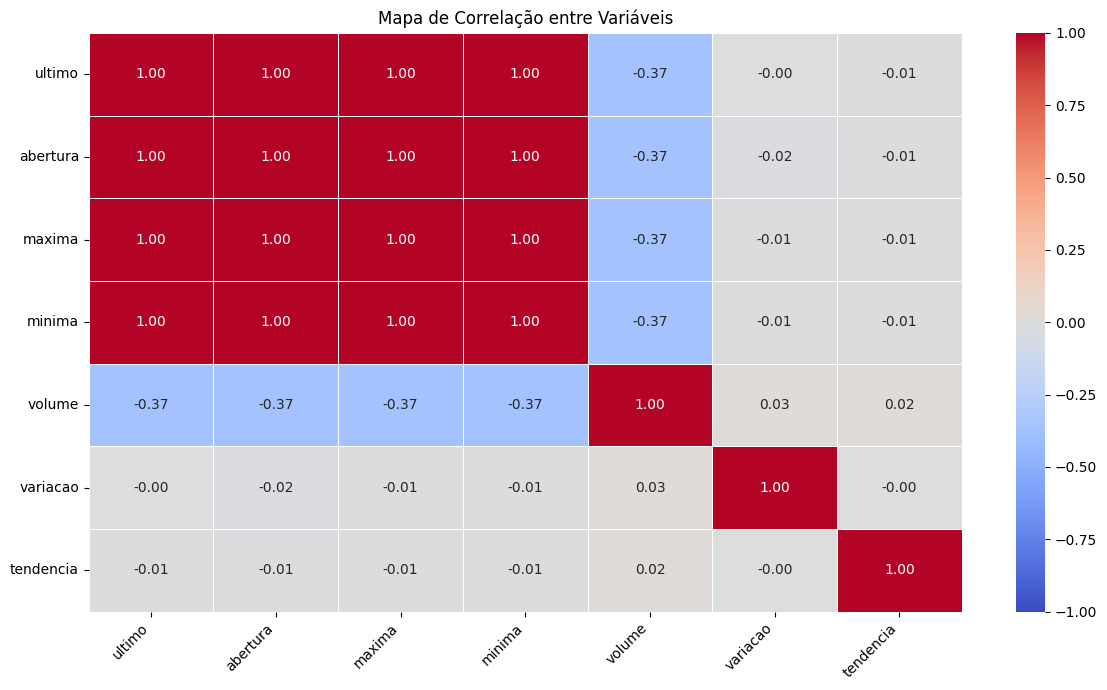

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# (recomendado) calcular a correlação só no TREINO para não “olhar” o período de teste
df_treino = df_ibovespa.iloc[:-30].copy()

# monte aqui a lista de colunas que você quer no mapa (inclua a target se quiser ver)
cols_corr = [
    "ultimo", "abertura", "maxima", "minima", "volume", "variacao", "tendencia"
]

df_corr = df_treino[cols_corr].corr()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("Mapa de Correlação entre Variáveis")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## **Interpretação**

## Análise do Mapa de Correlação entre Variáveis

### O que será mostrado

O mapa de correlação mede o quanto duas variáveis “andam juntas” (linearmente):
- **+1.00**: sobem/descem praticamente juntas
- **0.00**: não existe relação linear clara
- **-1.00**: quando uma sobe, a outra tende a cair (relação inversa)

### Conclusão (continuação)
Diante da forte redundância entre as variáveis dque tratam de valor (preço) e da ausência de correlação linear da variável alvo **tendencia** com as features atuais, **não é recomendado avançar com o treinamento de modelos apenas com essas variáveis brutas** (Abertura, Máxima, Mínima e ultima + volume + variação).

Na prática, essa configuração tende a gerar um modelo com comportamento próximo de um **baseline**, com baixa capacidade de generalização e pouca utilidade para tomada de decisão.

Com isso o próximo passo será aplicar **engenharia de atributos (feature engineering)**, criando variáveis temporais (lags, médias móveis, volatilidade, indicadores técnicos etc.) para capturar a dinâmica histórica e melhorar o poder preditivo.






# **Feature Engineering**

## **Estratégia de engenharia de atributos**

Aqui irei criar novas colunas (features) com o objetivo de dar ao modelo mais contexto sobre o comportamento histórico do IBOVESPA, sempre usando apenas informações disponíveis até o dia *t* (sem utilizar dados do futuro).

**Novas colunas**
---

### 1) **Retornos/defasagens (lags)**

- **retorno_1d** – Variação percentual de 1 dia: mostra o comportamento de ontem para hoje  
- **retorno_3d** – Variação percentual de 3 dias: indica tendência de curtíssimo prazo  
- **retorno_7d** – Variação percentual de 7 dias: indica sinal de tendência semanal  

### 2) **Médias móveis (SMA – média simples)**

- **media_movel_3** – Média do fechamento dos últimos 3 dias: suaviza ruídos diários  
- **media_movel_7** – Média do fechamento dos últimos 7 dias: mostra a direção geral da semana  

### 3) **Volatilidade em janela (std de retornos)**  
*(volatilidade calculada sobre retornos, não sobre preços)*

- **volatilidade_3d** – Desvio padrão dos **retornos** dos últimos 3 dias: mede instabilidade recente  
- **volatilidade_7d** – Desvio padrão dos **retornos** dos últimos 7 dias: mede instabilidade semanal e ajuda a detectar movimentos bruscos  

### 4) **RSI(14)**

- **rsi_14** – Índice de Força Relativa calculado em 14 dias: mede a força e velocidade dos movimentos.  
  Valores acima de 70 sugerem sobrecompra (possível reversão para queda) e abaixo de 30 sugerem sobrevenda (possível reversão para alta).

### 5) **MACD(12,26,9) (EMA – médias exponenciais)**

- **macd** – Diferença entre as EMAs de 12 e 26 dias; valores positivos sugerem tendência de alta  
- **macd_signal** – EMA de 9 dias do próprio MACD (linha de sinal), usada para detectar cruzamentos  
- **macd_diff** – Histograma (macd − macd_signal), mostrando a força do sinal de tendência (quanto maior o valor absoluto, maior a intensidade do movimento)  

### 6) **Distância do preço para a média (relação preço/média)**

- **dist_mm_7** – Relação do fechamento com a média móvel de 7 dias: indica se o preço está acima/abaixo do padrão recente e o quanto ele está “esticado” em relação à média  

### 7) **Volume (variação e razão vs média)**

- **volume_var_1d** – Variação percentual do volume em 1 dia  
- **volume_ratio_7d** – Volume do dia dividido pela média móvel de 7 dias do volume, indicando se o volume está acima ou abaixo do padrão recente  





In [34]:
# A biblioteca "ta" é usada para calcular indicadores técnicos de mercado a partir de séries de preço e volume.
# Ela facilita a engenharia de atributos porque já disponibiliza, de forma pronta, indicadores como RSI, MACD,
# médias móveis (SMA/EMA), Bandas de Bollinger, ATR, ADX, Estocástico, entre outros, evitando implementações manuais.

!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=64d932cd5e3cfc6ca51fb68583aa97e41fe78691b86f8d90d4319a9dd9fa9401
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [35]:
# Bloco de criação das novas variáveis

# Variação percentual de 1 dia: para mostrar o comportamento de ontem para hoje
df_ibovespa['retorno_1d'] = df_ibovespa['ultimo'].pct_change(periods=1)

# Variação acumulada dos últimos 3 dias: para mostrar a tendência de curtíssimo prazo
df_ibovespa['retorno_3d'] = df_ibovespa['ultimo'].pct_change(periods=3)

# Variação acumulada dos últimos 7 dias: para mostrar o sinal de tendência semanal
df_ibovespa['retorno_7d'] = df_ibovespa['ultimo'].pct_change(periods=7)


# Colunas de MÉDIAS MÓVEIS

# Média dos preços de fechamento dos últimos 3 dias: para suavizar ruídos diários
df_ibovespa['media_movel_3'] = df_ibovespa['ultimo'].rolling(window=3).mean()

# Média dos últimos 7 dias: para mostrar a direção geral da semana
df_ibovespa['media_movel_7'] = df_ibovespa['ultimo'].rolling(window=7).mean()


# Colunas de desvio padrão - VOLATILIDADE (calculada sobre retornos, não sobre preço)

# Desvio padrão dos retornos de 1 dia nos últimos 3 dias: mede instabilidade recente
df_ibovespa['volatilidade_3d'] = df_ibovespa['retorno_1d'].rolling(window=3).std()

# Desvio padrão dos retornos de 1 dia nos últimos 7 dias: mede instabilidade semanal
df_ibovespa['volatilidade_7d'] = df_ibovespa['retorno_1d'].rolling(window=7).std()


# === INDICADORES TÉCNICOS ADICIONAIS ===
import ta

# RSI (14 dias)
df_ibovespa['rsi_14'] = ta.momentum.RSIIndicator(close=df_ibovespa['ultimo'], window=14).rsi()

# MACD (12-26-9 padrão)
macd = ta.trend.MACD(close=df_ibovespa['ultimo'])
df_ibovespa['macd'] = macd.macd()
df_ibovespa['macd_signal'] = macd.macd_signal()
df_ibovespa['macd_diff'] = macd.macd_diff()


# Distância percentual do preço atual para a média móvel de 7 dias:
# (preço / MM7) - 1  -> positivo quando o preço está acima da MM7
df_ibovespa['dist_mm_7'] = (df_ibovespa['ultimo'] / df_ibovespa['media_movel_7']) - 1

# Variação percentual do volume em 1 dia (ontem -> hoje)
# Obs.: ajuste o nome da coluna de volume se no seu df for diferente de 'volume'
df_ibovespa['volume_var_1d'] = df_ibovespa['volume'].pct_change(periods=1)

# Razão do volume atual pela média móvel de 7 dias do volume:
# volume / MM7(volume)
df_ibovespa['volume_ratio_7d'] = df_ibovespa['volume'] / df_ibovespa['volume'].rolling(window=7).mean()


# === LIMPEZA FINAL ===
# Remove linhas com NaNs gerados pelos lags/janelas e indicadores técnicos
df_ibovespa = df_ibovespa.dropna(subset=[
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff',
    'dist_mm_7', 'volume_var_1d', 'volume_ratio_7d'
])



In [36]:
# Verificar se as minhas novas variáveis foram criadas

print(df_ibovespa.head())

         data  ultimo  abertura  maxima  minima        volume  variacao  \
33 1994-09-16  5294.0    5288.0  5424.0  5225.0  1.057000e+10    0.0011   
34 1994-09-19  5292.0    5294.0  5354.0  5259.0  6.420000e+09   -0.0004   
35 1994-09-20  5177.0    5292.0  5296.0  5163.0  7.630000e+09   -0.0217   
36 1994-09-21  5306.0    5177.0  5318.0  5172.0  1.980000e+10    0.0249   
37 1994-09-22  5395.0    5344.0  5428.0  5303.0  1.229000e+10    0.0168   

    tendencia  retorno_1d  retorno_3d  ...  media_movel_7  volatilidade_3d  \
33          0    0.001135   -0.039376  ...    5386.142857         0.018694   
34          0   -0.000378   -0.033601  ...    5389.000000         0.020054   
35          1   -0.021731   -0.020991  ...    5364.142857         0.012787   
36          1    0.024918    0.002267  ...    5334.857143         0.023352   
37          1    0.016773    0.019463  ...    5318.285714         0.024917   

    volatilidade_7d     rsi_14        macd  macd_signal  macd_diff  dist_mm_7  \

**verificar estatísticas básicas**, valores extremos e possíveis erros visíveis

In [37]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,variacao,tendencia,retorno_1d,retorno_3d,...,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff,dist_mm_7,volume_var_1d,volume_ratio_7d
count,7644,7644.000000,7644.000000,7644.000000,7644.000000,7.644000e+03,7644.000000,7644.000000,7644.000000,7644.000000,...,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000,7644.000000
mean,2010-02-27 04:34:05.839874304,53142.414835,53126.743459,53646.704605,52614.450157,1.669460e+09,0.000622,0.520931,0.000622,0.001854,...,53092.217052,0.015278,0.016614,52.797776,120.298750,120.877003,-0.578253,0.001388,0.242196,1.001493
min,1994-09-16 00:00:00,2138.000000,2138.000000,2449.000000,2110.000000,1.121000e+05,-0.158100,0.000000,-0.158090,-0.254273,...,2618.428571,0.000245,0.002410,13.245486,-12092.405368,-10303.426794,-3250.441270,-0.221818,-0.981334,0.019607
25%,2002-06-16 06:00:00,14777.500000,14758.750000,14923.750000,14520.000000,3.610000e+06,-0.009100,0.000000,-0.009112,-0.015164,...,14703.035714,0.007943,0.010278,43.852357,-308.618261,-288.789910,-124.284577,-0.011624,-0.164932,0.845327
50%,2010-03-02 12:00:00,51888.000000,51867.000000,52488.000000,51375.500000,1.145500e+07,0.000800,1.000000,0.000833,0.002376,...,51975.285714,0.012425,0.014032,52.703928,99.707403,102.761935,4.497042,0.002412,-0.006781,0.977987
75%,2017-11-14 12:00:00,73292.750000,73182.500000,74188.000000,72387.000000,2.823125e+08,0.010800,1.000000,0.010837,0.019854,...,73079.000000,0.018810,0.019260,61.917786,611.148397,588.801892,124.459997,0.016328,0.188508,1.122253
max,2025-07-30 00:00:00,141264.000000,141265.000000,141564.000000,140597.000000,5.406000e+10,0.334200,1.000000,0.334190,0.459561,...,139777.142857,0.237590,0.150693,87.526295,4184.425241,3476.717814,2289.282082,0.202603,1146.574819,6.965523
std,NaN,38474.252317,38466.448797,38746.357242,38191.982138,3.994977e+09,0.020049,0.499594,0.020049,0.034685,...,38440.944739,0.013029,0.011593,12.237927,1059.201310,1002.348727,305.494616,0.026347,13.148751,0.293932


In [38]:
# Verificação de valores ausentes

print(df_ibovespa.isnull().sum())

data               0
ultimo             0
abertura           0
maxima             0
minima             0
volume             0
variacao           0
tendencia          0
retorno_1d         0
retorno_3d         0
retorno_7d         0
media_movel_3      0
media_movel_7      0
volatilidade_3d    0
volatilidade_7d    0
rsi_14             0
macd               0
macd_signal        0
macd_diff          0
dist_mm_7          0
volume_var_1d      0
volume_ratio_7d    0
dtype: int64


In [39]:
# Análisar do balanceamento da variável alvo (tendencia)

df_ibovespa['tendencia'].value_counts(normalize=True)


,proportion
tendencia,
1,0.520931
0,0.479069


Sem desbalanceamento preocupante no conjunto completo (52% vs. 48%);

Isso aumenta a confiança do modelo que pode aprender padrões sem precisar de balanceamento artificial, desde que a divisão entre treino e teste também esteja proporcional.

In [73]:
# Realizar uma cópia do df_ibovespa com as features prontas

df_feat = df_ibovespa.copy()
df_model = df_feat.copy()


In [74]:
# 1) Garantir ordem por data

df_model = df_model.sort_values("data").reset_index(drop=True)

# 2) Criar o target (tendência do dia seguinte) e remover a última linha (sem amanhã)

df_model["tendencia"] = (df_model["ultimo"].shift(-1) > df_model["ultimo"]).astype(int)
df_model = df_model.iloc[:-1].reset_index(drop=True)

# 3) Definir X e y
features = [
    "retorno_1d", "retorno_3d", "retorno_7d",
    "media_movel_3", "media_movel_7",
    "volatilidade_3d", "volatilidade_7d",
    "rsi_14",
    "macd", "macd_signal", "macd_diff",
     "dist_mm_7", "volume_var_1d", "volume_ratio_7d"
]

X = df_model[features].copy()
y = df_model["tendencia"].copy()

# 4) Split (dividir os dados em partes para treinar e testar o modelo) temporal: últimos 30 dias para teste
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]

# 5) Verificar o balanceamento (contagem e proporção) - treino e teste
print("Balanceamento TREINO (contagem):")
print(y_train.value_counts())
print("\nBalanceamento TREINO (proporção):")
print(y_train.value_counts(normalize=True))

print("\nBalanceamento TESTE (contagem):")
print(y_test.value_counts())
print("\nBalanceamento TESTE (proporção):")
print(y_test.value_counts(normalize=True))


Balanceamento TREINO (contagem):
tendencia
1    3970
0    3643
Name: count, dtype: int64

Balanceamento TREINO (proporção):
tendencia
1    0.521476
0    0.478524
Name: proportion, dtype: float64

Balanceamento TESTE (contagem):
tendencia
0    18
1    12
Name: count, dtype: int64

Balanceamento TESTE (proporção):
tendencia
0    0.6
1    0.4
Name: proportion, dtype: float64


### Justificativa do Split Temporal (últimas 30 linhas)

Para este projeto, foi adotado um **split temporal** em que o conjunto de teste corresponde às **últimas 30 linhas** do dataset, que representam os **30 pregões mais recentes disponíveis**.

Essa escolha é adequada porque a base do IBOVESPA contém **apenas dias de negociação** (não há registros para fins de semana e feriados). Portanto, utilizar as últimas 30 linhas garante um período recente e consistente de observações reais de mercado, além de simular o cenário prático de produção: **treinar com o histórico e avaliar no período mais recente**, sem embaralhar os dados e evitando vazamento de informação do futuro.

### Outra observação é que O conjunto de teste está desbalanceado

Mesmo que o conjunto completo esteja equilibrado (52% vs. 48%), os últimos 30 pregões — que é a parte que será usada para avaliar a performance do modelo está desbalanceada, com predomínio de quedas 63/37, mais puxado para “não alta”, sendo este um cenário realista do período dos ultimos 30 pregões


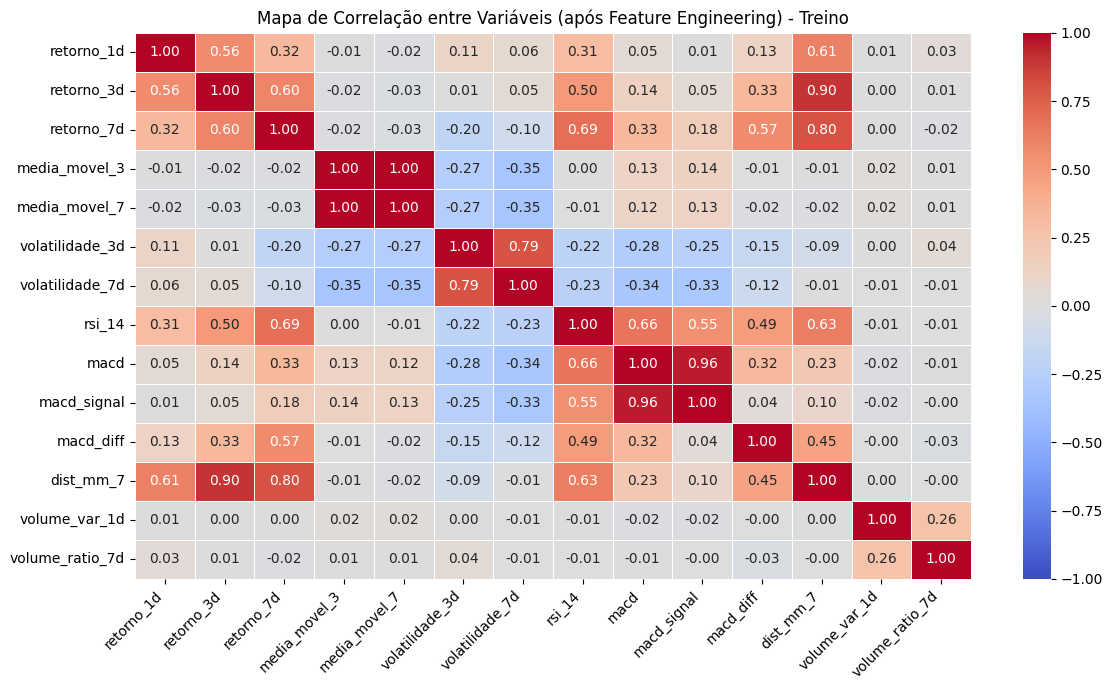

In [75]:
# Mapa de Correlação.

import seaborn as sns
import matplotlib.pyplot as plt

# Correlação só nas features do TREINO
df_corr = X_train.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("Mapa de Correlação entre Variáveis (após Feature Engineering) - Treino")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Interpretação do Mapa de Correlação (somente features do treino)

O mapa de correlação foi utilizado para identificar **redundância** entre as variáveis explicativas e reduzir risco de **multicolinearidade**, especialmente relevante em modelos lineares.

### O que foi observado
- **Médias móveis** (media_movel_3 e media_movel_7) apresentam correlação **muito alta (~1.00)**, indicando que carregam praticamente a mesma informação (preço suavizado em janelas próximas).
- **Volatilidades** (volatilidade_3d e volatilidade_7d) também têm correlação **alta (~0.79)**, pois medem o mesmo conceito (risco recente) em janelas diferentes.
- **MACD e MACD signal** têm correlação **muito alta (~0.96)**, o que é esperado porque o macd_signal é uma média do próprio MACD.
- **Retornos** (retorno_1d, retorno_3d, retorno_7d) possuem correlação positiva entre si, indicando sinais de movimento semelhantes em horizontes diferentes.

### Como isso será usado
- Correlação **muito alta entre features** indica possível duplicidade e pode justificar remoção de variáveis redundantes (principalmente para modelos lineares).
- Correlação **baixa entre features** não é um problema por si só; pode significar que as variáveis trazem informações diferentes.
- Importante: este mapa mede apenas **relações lineares** e não determina sozinho se uma feature é boa para previsão. A utilidade real será confirmada na avaliação do modelo com validação temporal.



In [76]:
# Rodando o Modelo Linear RL Para nalise dos dados

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório:\n", classification_report(y_test, y_pred, zero_division=0))


Acurácia: 0.6

Matriz de confusão:
 [[18  0]
 [12  0]]

Relatório:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00        12

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.38        30
weighted avg       0.36      0.60      0.45        30



## Conclusão (Modelo Linear)

A Regressão Logística (modelo linear) apresentou acurácia de **0,63** no teste, porém a **matriz de confusão** mostra que o modelo **classificou todos os casos como classe 0 (sem alta)**, não identificando nenhum dia de alta (classe 1).

Isso indica que, mesmo após a engenharia de atributos e a normalização, o modelo linear **não conseguiu aprender um padrão discriminante** para separar adequadamente as duas classes. Na prática, ele ficou próximo de um baseline, seguindo a classe predominante no período de teste, o que reduz sua utilidade para previsão.

Diante desse comportamento, o próximo passo é avançar para **modelos não lineares**, que conseguem capturar relações mais complexas e interações entre variáveis (ex.: árvores, Random Forest, Gradient Boosting), aumentando a chance de extrair sinal preditivo a partir das features construídas.


## **Função para teste de modelos**

Como serão testados vários modelos abaixo será criada uma função para ser usada e economizar tempo durante a execução dos modelos... A função faz:

* treina, calcula acurácia, matriz de confusão (plot), relatório, ROC/AUC, e Permutation Importance

* Salva tudo numa lista resultados para comparar depois

* resumo_resultados(...): gera uma tabela final (DataFrame) ordenada. Depois que testar todos os modelos executar...

**df_comparacao = resumo_resultados(resultados, ordenar_por="acuracia")
print(df_comparacao)**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
)
from sklearn.inspection import permutation_importance


def avaliar_modelo(
    modelo,
    nome_modelo: str,
    X_train, y_train,
    X_test, y_test,
    resultados: list,
    plotar: bool = True,
    roc: bool = True,
    importancia: bool = False,
    n_repeats: int = 20,
    random_state: int = 42
):
    """
    Treina e avalia um modelo de classificação binária.
    Salva métricas em `resultados` e opcionalmente plota Matriz de Confusão, ROC e Permutation Importance.
    """

    # 1) Treino
    modelo.fit(X_train, y_train)

    # 2) Predição de classe
    y_pred = modelo.predict(X_test)

    # 3) Métricas básicas
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    relatorio = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

    # 4) Probabilidades para ROC/AUC (se possível)
    auc = None
    y_score = None
    if roc:
        if hasattr(modelo, "predict_proba"):
            y_score = modelo.predict_proba(X_test)[:, 1]
        elif hasattr(modelo, "decision_function"):
            y_score = modelo.decision_function(X_test)

        if y_score is not None:
            try:
                auc = roc_auc_score(y_test, y_score)
            except Exception:
                auc = None

    # 5) Prints
    print(f"\n===== {nome_modelo} =====")
    print("Acurácia:", acc)
    print("\nMatriz de confusão:\n", cm)
    print("\nRelatório:\n", classification_report(y_test, y_pred, zero_division=0))

    # 6) Plots (opcionais)
    if plotar:
        # Matriz de Confusão (igual ao estilo do sklearn)
        plt.figure(figsize=(6, 5))
        ConfusionMatrixDisplay.from_predictions(
            y_test, y_pred,
            display_labels=["0 (sem alta)", "1 (alta)"]
        )
        plt.title(f"Matriz de Confusão - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Curva ROC
        if roc and y_score is not None and auc is not None:
            plt.figure(figsize=(6, 5))
            RocCurveDisplay.from_predictions(y_test, y_score)
            plt.title(f"Curva ROC - {nome_modelo} (AUC = {auc:.2f})")
            plt.tight_layout()
            plt.show()

    # 7) Permutation Importance (opcional)
    imp_media = None
    imp_std = None
    if importancia:
        try:
            perm = permutation_importance(
                modelo, X_test, y_test,
                n_repeats=n_repeats,
                random_state=random_state,
                scoring="accuracy"
            )
            imp_media = perm.importances_mean
            imp_std = perm.importances_std

            imp_df = (
                pd.DataFrame({
                    "feature": X_test.columns,
                    "importancia_media": imp_media,
                    "importancia_std": imp_std
                })
                .sort_values("importancia_media", ascending=False)
            )

            print("\nTop 10 features (Permutation Importance):")
            print(imp_df.head(10))

            if plotar:
                plt.figure(figsize=(10, 4))
                plt.bar(imp_df["feature"], imp_df["importancia_media"])
                plt.xticks(rotation=45, ha="right")
                plt.title(f"Importância das Variáveis - {nome_modelo} (Permutation Importance)")
                plt.ylabel("Impacto na acurácia")
                plt.xlabel("Variáveis")
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print("\nPermutation Importance não foi possível para este modelo:", str(e))

    # 8) Guardar resultado para comparação final
    resultado = {
        "modelo": nome_modelo,
        "acuracia": acc,
        "auc": auc,
        "tn": int(cm[0, 0]),
        "fp": int(cm[0, 1]),
        "fn": int(cm[1, 0]),
        "tp": int(cm[1, 1]),
        "precision_1": relatorio.get("1", {}).get("precision", np.nan),
        "recall_1": relatorio.get("1", {}).get("recall", np.nan),
        "f1_1": relatorio.get("1", {}).get("f1-score", np.nan),
    }

    resultados.append(resultado)
    return resultado


def resumo_resultados(resultados: list, ordenar_por: str = "acuracia"):
    """
    Gera um DataFrame para comparar os modelos testados.
    """
    df_res = pd.DataFrame(resultados).copy()
    if ordenar_por in df_res.columns:
        df_res = df_res.sort_values(ordenar_por, ascending=False).reset_index(drop=True)
    return df_res



===== Logistic Regression (Scaler + class_weight) =====
Acurácia: 0.6

Matriz de confusão:
 [[18  0]
 [12  0]]

Relatório:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00        12

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.38        30
weighted avg       0.36      0.60      0.45        30



<Figure size 600x500 with 0 Axes>

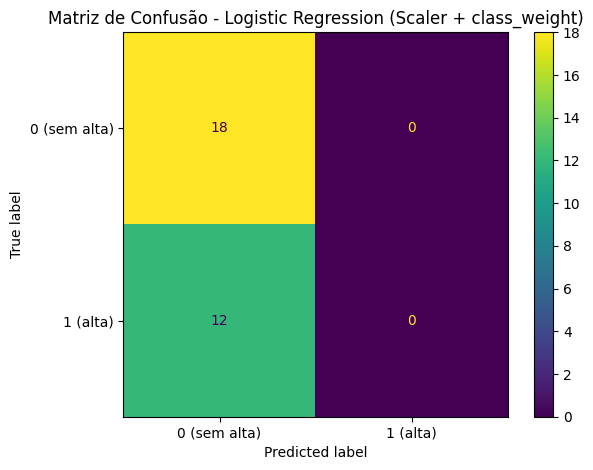

<Figure size 600x500 with 0 Axes>

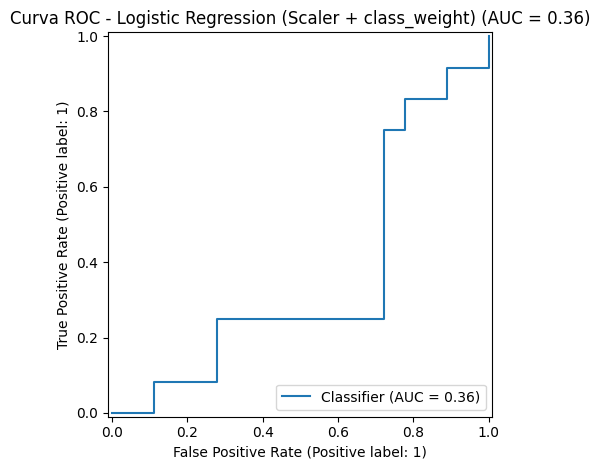


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
7            rsi_14           0.068333         0.064528
11        dist_mm_7           0.056667         0.051747
1        retorno_3d           0.038333         0.026405
0        retorno_1d           0.035000         0.032447
10        macd_diff           0.026667         0.027080
8              macd           0.020000         0.022111
9       macd_signal           0.016667         0.024721
5   volatilidade_3d           0.010000         0.015275
13  volume_ratio_7d           0.003333         0.023333
2        retorno_7d           0.001667         0.040104


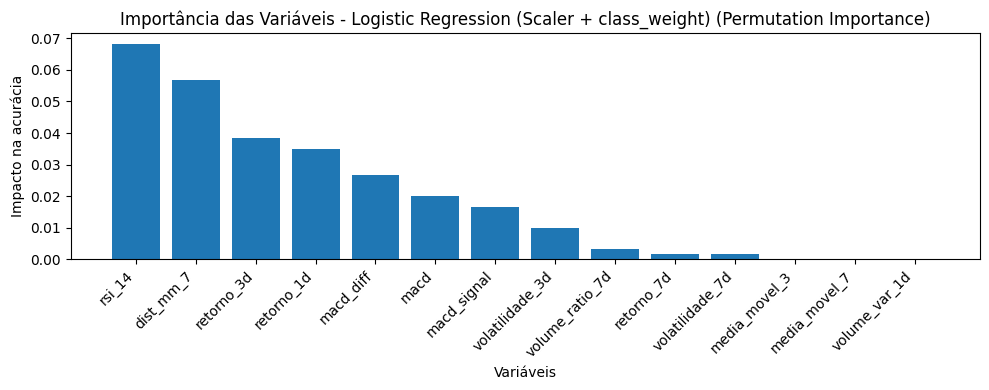

In [78]:
resultados = []

# Modelo 1: Regressão Logística
resultado_lr = avaliar_modelo(
    pipe, "Logistic Regression (Scaler + class_weight)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)





===== Gradient Boosting =====
Acurácia: 0.5333333333333333

Matriz de confusão:
 [[13  5]
 [ 9  3]]

Relatório:
               precision    recall  f1-score   support

           0       0.59      0.72      0.65        18
           1       0.38      0.25      0.30        12

    accuracy                           0.53        30
   macro avg       0.48      0.49      0.47        30
weighted avg       0.50      0.53      0.51        30



<Figure size 600x500 with 0 Axes>

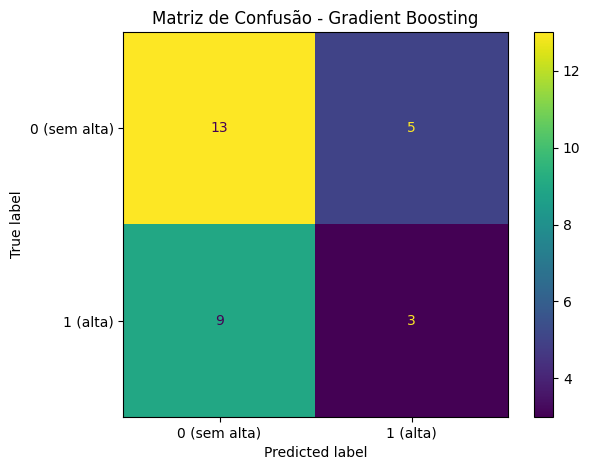

<Figure size 600x500 with 0 Axes>

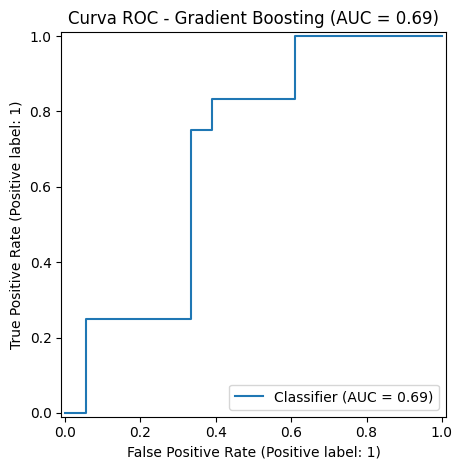


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
3     media_movel_3           0.030000         0.056667
5   volatilidade_3d           0.006667         0.027080
11        dist_mm_7           0.000000         0.000000
9       macd_signal          -0.013333         0.032318
0        retorno_1d          -0.015000         0.022298
12    volume_var_1d          -0.021667         0.032102
8              macd          -0.048333         0.038694
1        retorno_3d          -0.055000         0.024210
10        macd_diff          -0.060000         0.024944
4     media_movel_7          -0.061667         0.024210


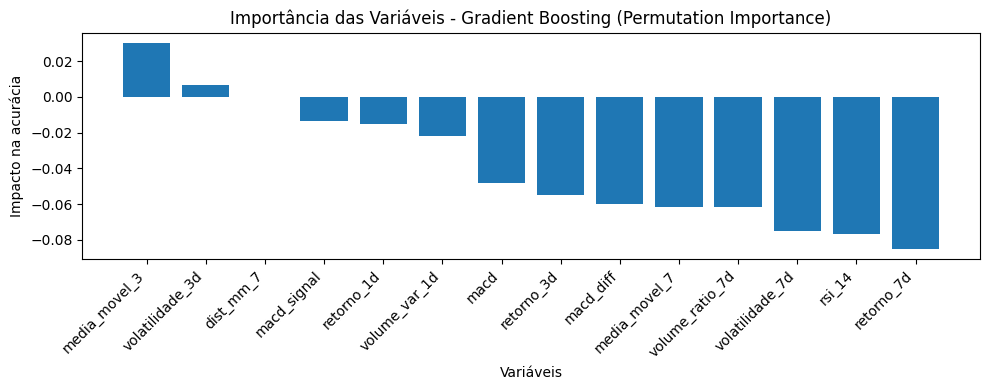

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Modelo 2: Gradient Boosting (não linear)
gb = GradientBoostingClassifier(random_state=42)

resultado_gb = avaliar_modelo(
    gb, "Gradient Boosting",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== Random Forest (500 árvores, class_weight=balanced) =====
Acurácia: 0.5333333333333333

Matriz de confusão:
 [[11  7]
 [ 7  5]]

Relatório:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        18
           1       0.42      0.42      0.42        12

    accuracy                           0.53        30
   macro avg       0.51      0.51      0.51        30
weighted avg       0.53      0.53      0.53        30



<Figure size 600x500 with 0 Axes>

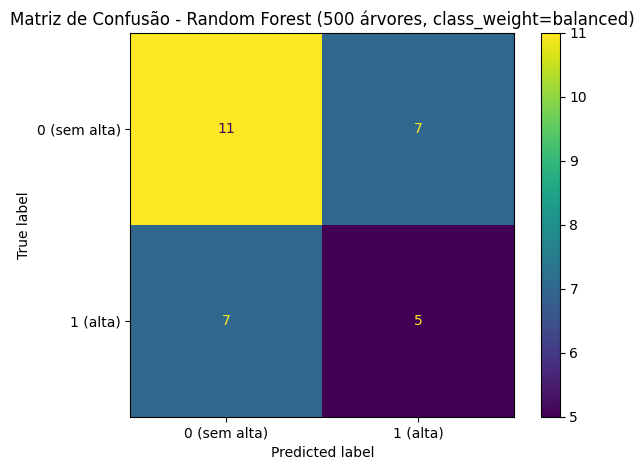

<Figure size 600x500 with 0 Axes>

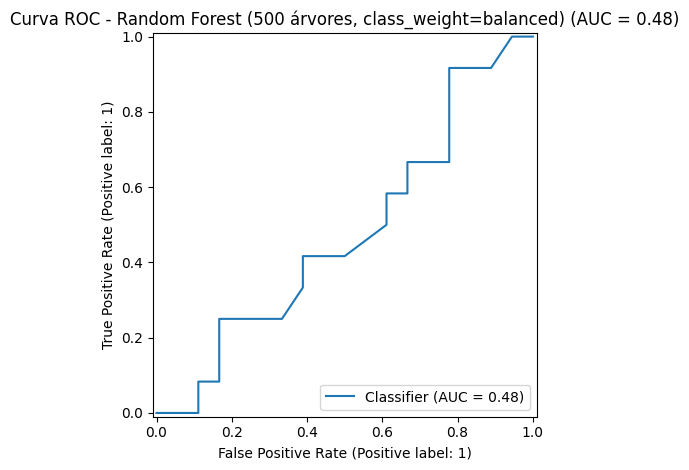


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
0        retorno_1d           0.093333         0.030912
8              macd           0.065000         0.047697
13  volume_ratio_7d           0.046667         0.066165
5   volatilidade_3d           0.030000         0.031447
10        macd_diff           0.028333         0.064356
1        retorno_3d           0.026667         0.042947
9       macd_signal           0.008333         0.029580
2        retorno_7d           0.005000         0.050854
4     media_movel_7           0.003333         0.010000
7            rsi_14           0.000000         0.051640


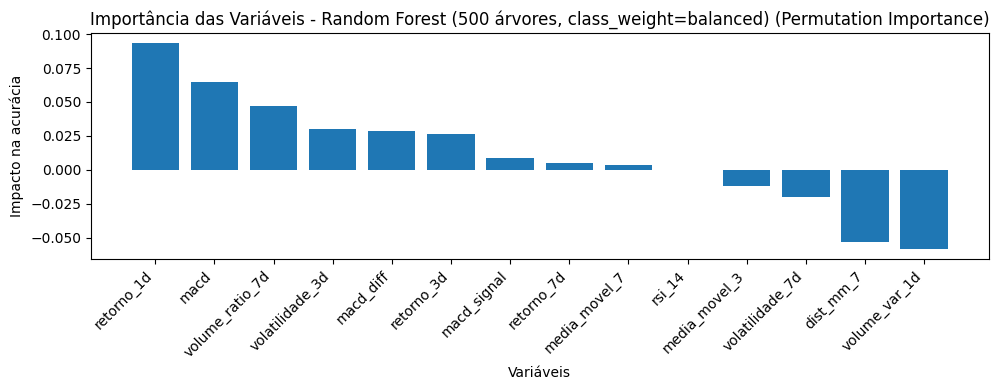

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Modelo 3: Random Forest (não linear)
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
    max_depth=None
)

resultado_rf = avaliar_modelo(
    rf, "Random Forest (500 árvores, class_weight=balanced)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== HistGradientBoosting (max_depth=6, lr=0.05, iter=500) =====
Acurácia: 0.4

Matriz de confusão:
 [[9 9]
 [9 3]]

Relatório:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        18
           1       0.25      0.25      0.25        12

    accuracy                           0.40        30
   macro avg       0.38      0.38      0.38        30
weighted avg       0.40      0.40      0.40        30



<Figure size 600x500 with 0 Axes>

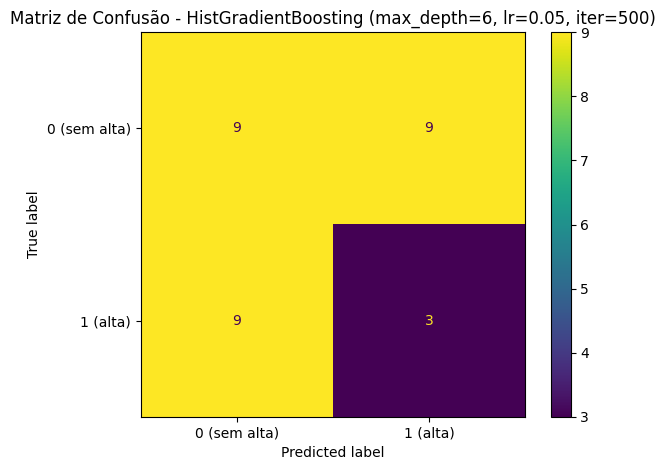

<Figure size 600x500 with 0 Axes>

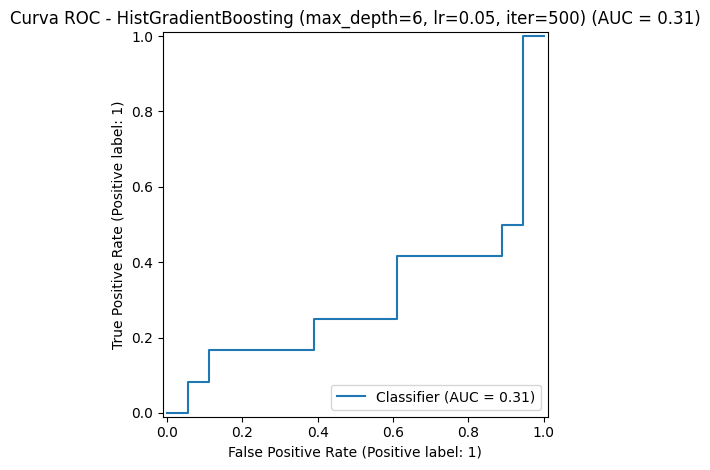


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
0        retorno_1d       2.666667e-02         0.048990
1        retorno_3d       2.166667e-02         0.024210
10        macd_diff       2.166667e-02         0.041197
5   volatilidade_3d       2.000000e-02         0.028674
7            rsi_14       1.000000e-02         0.044845
3     media_movel_3       8.333333e-03         0.014434
8              macd       1.942890e-17         0.050553
4     media_movel_7       0.000000e+00         0.000000
2        retorno_7d      -1.666667e-03         0.060987
6   volatilidade_7d      -6.666667e-03         0.051208


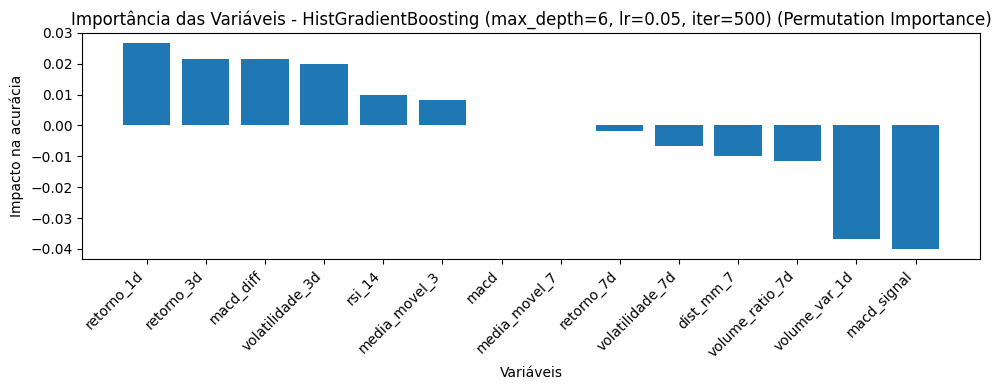

In [81]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Modelo 4: HistGradientBoosting (não linear)
hgb = HistGradientBoostingClassifier(
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    max_iter=500
)

resultado_hgb = avaliar_modelo(
    hgb, "HistGradientBoosting (max_depth=6, lr=0.05, iter=500)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== SVC (RBF + Scaler, class_weight=balanced) =====
Acurácia: 0.6666666666666666

Matriz de confusão:
 [[17  1]
 [ 9  3]]

Relatório:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77        18
           1       0.75      0.25      0.38        12

    accuracy                           0.67        30
   macro avg       0.70      0.60      0.57        30
weighted avg       0.69      0.67      0.61        30



<Figure size 600x500 with 0 Axes>

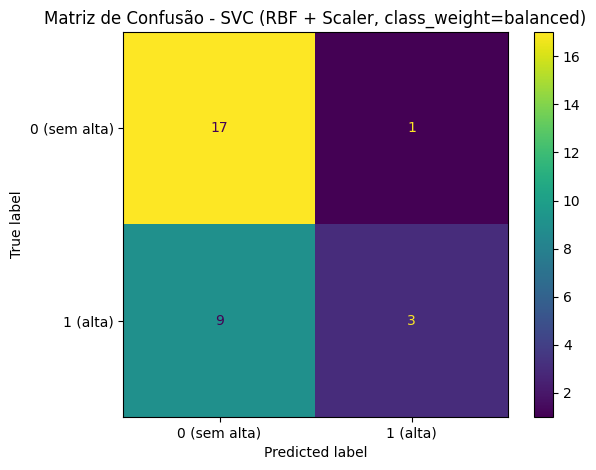

<Figure size 600x500 with 0 Axes>

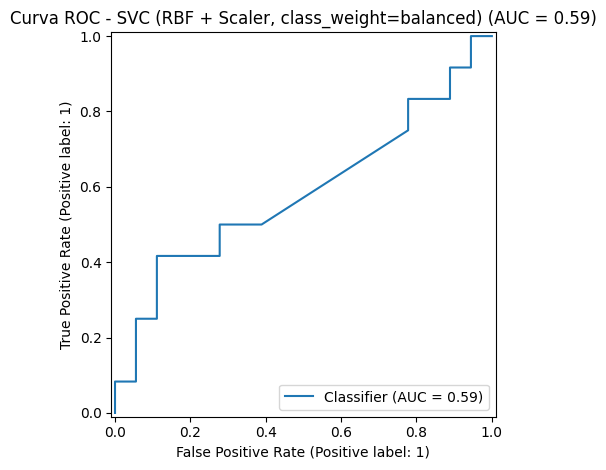


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
8              macd           0.056667         0.036667
10        macd_diff           0.038333         0.028431
11        dist_mm_7           0.035000         0.038694
1        retorno_3d           0.028333         0.011902
2        retorno_7d           0.020000         0.026667
7            rsi_14           0.018333         0.022298
9       macd_signal           0.011667         0.024210
5   volatilidade_3d           0.011667         0.019076
3     media_movel_3           0.000000         0.000000
4     media_movel_7           0.000000         0.000000


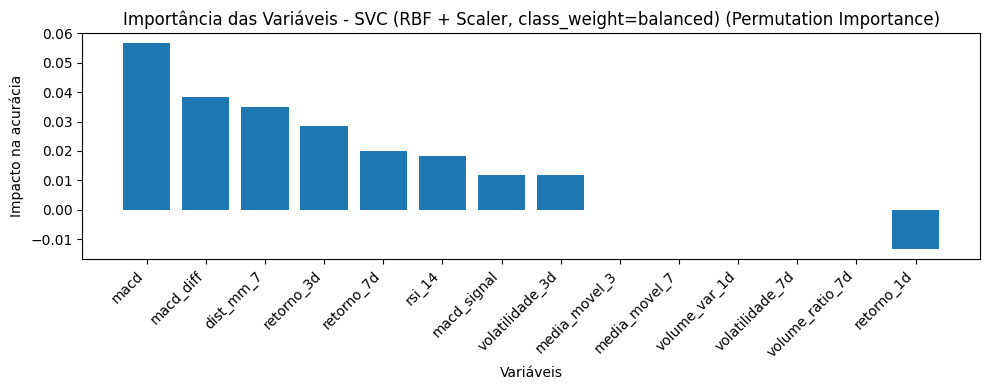

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Modelo 5: SVC (RBF) (não linear) com normalização
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, class_weight="balanced", random_state=42))
])

resultado_svc = avaliar_modelo(
    svc, "SVC (RBF + Scaler, class_weight=balanced)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== KNN (k=15, weights=distance, + Scaler) =====
Acurácia: 0.5

Matriz de confusão:
 [[ 7 11]
 [ 4  8]]

Relatório:
               precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.42      0.67      0.52        12

    accuracy                           0.50        30
   macro avg       0.53      0.53      0.50        30
weighted avg       0.55      0.50      0.50        30



<Figure size 600x500 with 0 Axes>

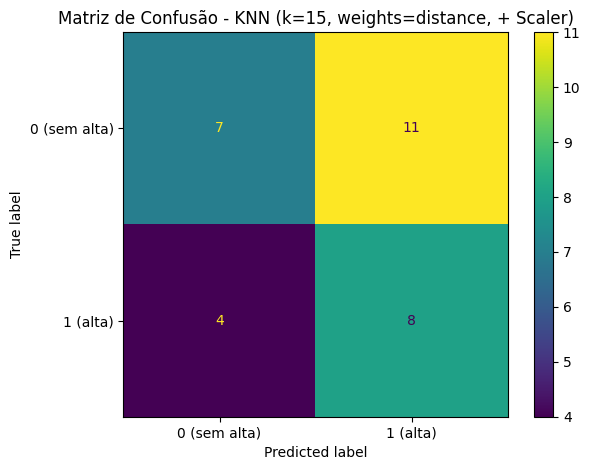

<Figure size 600x500 with 0 Axes>

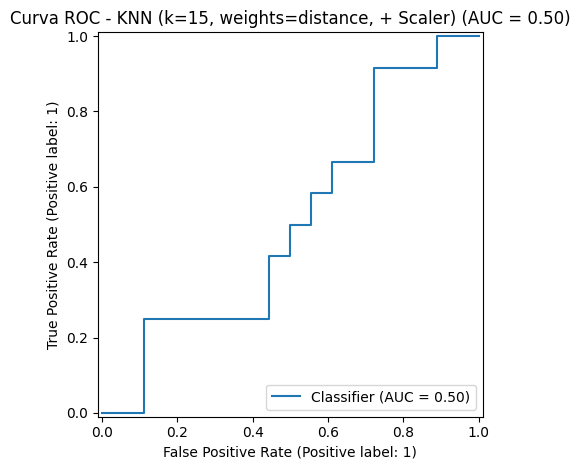


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
13  volume_ratio_7d           0.068333         0.047697
2        retorno_7d           0.038333         0.046278
1        retorno_3d           0.028333         0.041197
9       macd_signal           0.018333         0.045308
5   volatilidade_3d           0.013333         0.046428
3     media_movel_3           0.006667         0.024944
12    volume_var_1d           0.000000         0.000000
11        dist_mm_7          -0.001667         0.047697
4     media_movel_7          -0.003333         0.025604
8              macd          -0.015000         0.074889


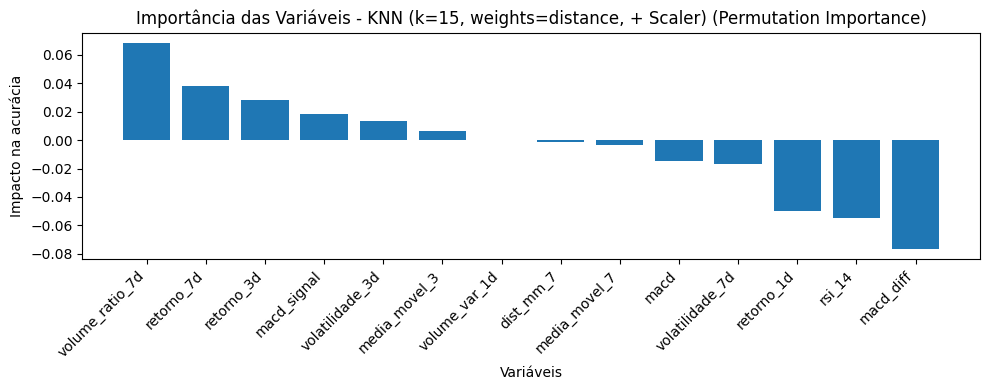

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Modelo 6: KNN (não linear) com normalização
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=15, weights="distance"))
])

resultado_knn = avaliar_modelo(
    knn, "KNN (k=15, weights=distance, + Scaler)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== KNN (k=15, weights=distance, + Scaler) =====
Acurácia: 0.5

Matriz de confusão:
 [[ 7 11]
 [ 4  8]]

Relatório:
               precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.42      0.67      0.52        12

    accuracy                           0.50        30
   macro avg       0.53      0.53      0.50        30
weighted avg       0.55      0.50      0.50        30



<Figure size 600x500 with 0 Axes>

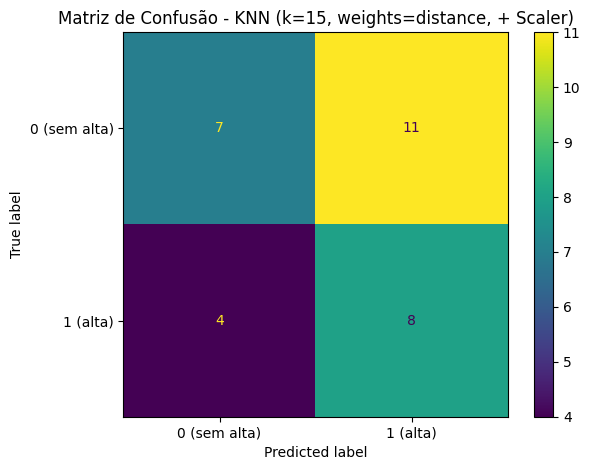

<Figure size 600x500 with 0 Axes>

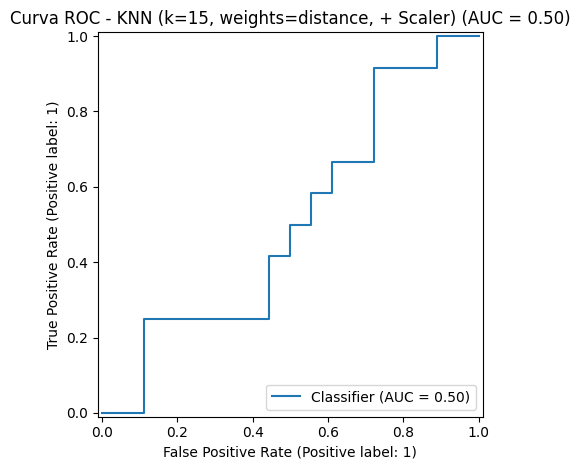


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
13  volume_ratio_7d           0.068333         0.047697
2        retorno_7d           0.038333         0.046278
1        retorno_3d           0.028333         0.041197
9       macd_signal           0.018333         0.045308
5   volatilidade_3d           0.013333         0.046428
3     media_movel_3           0.006667         0.024944
12    volume_var_1d           0.000000         0.000000
11        dist_mm_7          -0.001667         0.047697
4     media_movel_7          -0.003333         0.025604
8              macd          -0.015000         0.074889


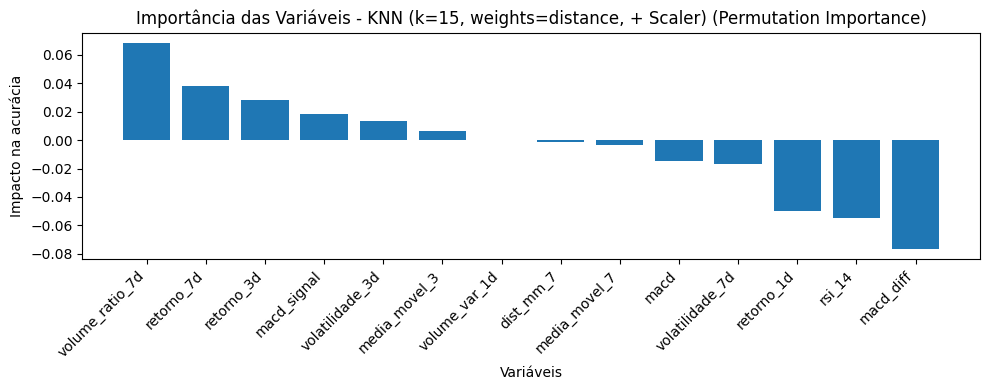

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Modelo 6: KNN (não linear) com normalização
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=15, weights="distance"))
])

resultado_knn = avaliar_modelo(
    knn, "KNN (k=15, weights=distance, + Scaler)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== AdaBoost (n=500, lr=0.05) =====
Acurácia: 0.4

Matriz de confusão:
 [[ 0 18]
 [ 0 12]]

Relatório:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.40      1.00      0.57        12

    accuracy                           0.40        30
   macro avg       0.20      0.50      0.29        30
weighted avg       0.16      0.40      0.23        30



<Figure size 600x500 with 0 Axes>

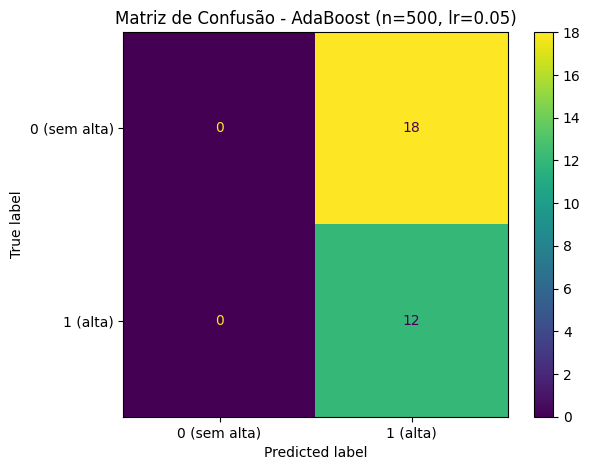

<Figure size 600x500 with 0 Axes>

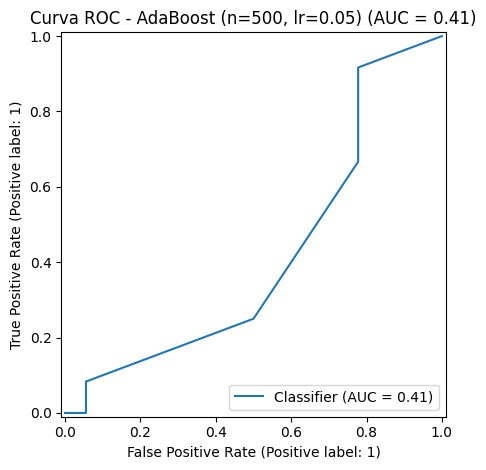


Top 10 features (Permutation Importance):
           feature  importancia_media  importancia_std
0       retorno_1d                0.0              0.0
1       retorno_3d                0.0              0.0
2       retorno_7d                0.0              0.0
3    media_movel_3                0.0              0.0
4    media_movel_7                0.0              0.0
5  volatilidade_3d                0.0              0.0
6  volatilidade_7d                0.0              0.0
7           rsi_14                0.0              0.0
8             macd                0.0              0.0
9      macd_signal                0.0              0.0


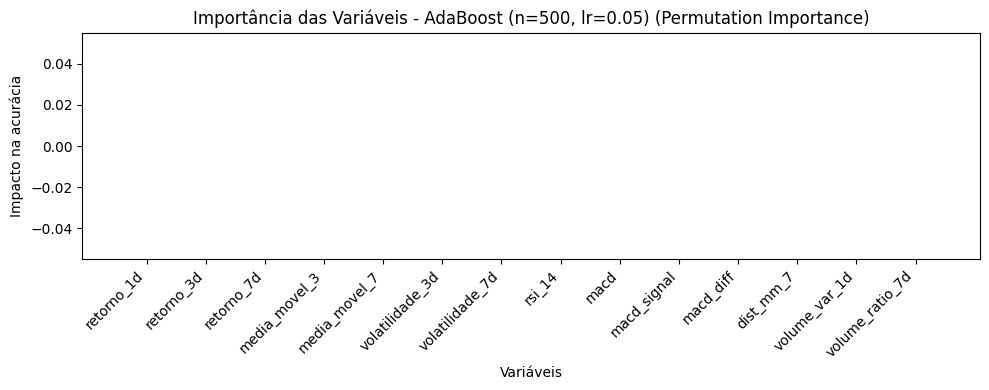

In [85]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

resultado_ada = avaliar_modelo(
    ada, "AdaBoost (n=500, lr=0.05)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== GaussianNB =====
Acurácia: 0.4

Matriz de confusão:
 [[ 0 18]
 [ 0 12]]

Relatório:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.40      1.00      0.57        12

    accuracy                           0.40        30
   macro avg       0.20      0.50      0.29        30
weighted avg       0.16      0.40      0.23        30



<Figure size 600x500 with 0 Axes>

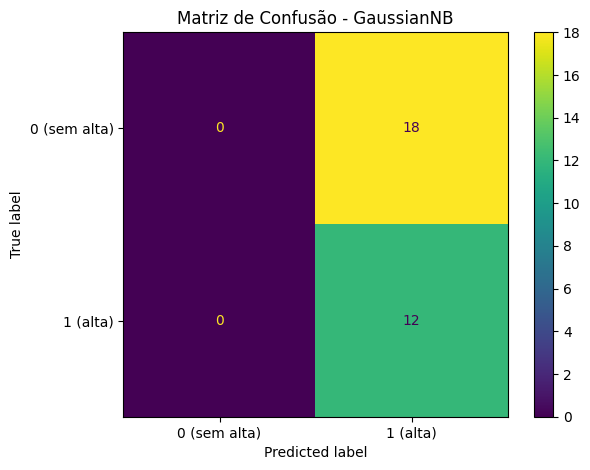

<Figure size 600x500 with 0 Axes>

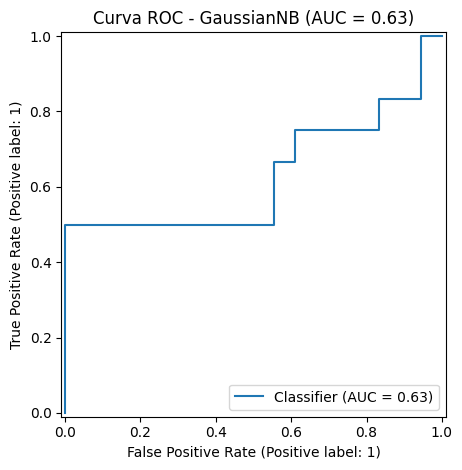

In [86]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

resultado_gnb = avaliar_modelo(
    gnb, "GaussianNB",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=False
)



===== MLP (64-32, relu, adam) + Scaler =====
Acurácia: 0.43333333333333335

Matriz de confusão:
 [[ 6 12]
 [ 5  7]]

Relatório:
               precision    recall  f1-score   support

           0       0.55      0.33      0.41        18
           1       0.37      0.58      0.45        12

    accuracy                           0.43        30
   macro avg       0.46      0.46      0.43        30
weighted avg       0.47      0.43      0.43        30



<Figure size 600x500 with 0 Axes>

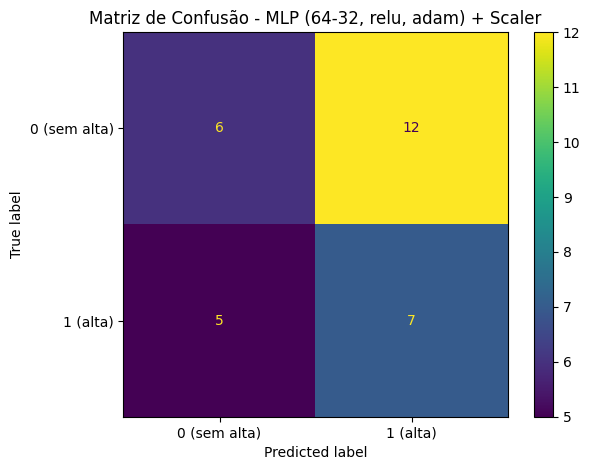

<Figure size 600x500 with 0 Axes>

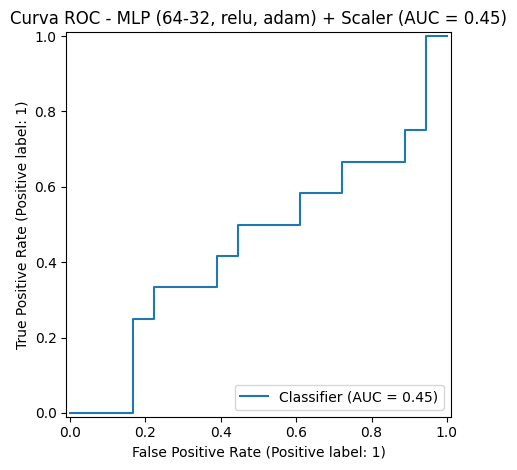

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-3,
        max_iter=2000,
        random_state=42
    ))
])

resultado_mlp = avaliar_modelo(
    mlp, "MLP (64-32, relu, adam) + Scaler",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=False
)


In [88]:
df_comparacao = resumo_resultados(resultados, ordenar_por="acuracia")

# Mostra um resumo limpo com as principais métricas
cols = [
    "modelo", "acuracia", "auc",
    "precision_1", "recall_1", "f1_1",
    "tn", "fp", "fn", "tp"
]

print(df_comparacao[cols].to_string(index=False))


                                               modelo  acuracia      auc  precision_1  recall_1     f1_1  tn  fp  fn  tp
            SVC (RBF + Scaler, class_weight=balanced)  0.666667 0.585648     0.750000  0.250000 0.375000  17   1   9   3
          Logistic Regression (Scaler + class_weight)  0.600000 0.361111     0.000000  0.000000 0.000000  18   0  12   0
                                    Gradient Boosting  0.533333 0.685185     0.375000  0.250000 0.300000  13   5   9   3
   Random Forest (500 árvores, class_weight=balanced)  0.533333 0.476852     0.416667  0.416667 0.416667  11   7   7   5
               KNN (k=15, weights=distance, + Scaler)  0.500000 0.504630     0.421053  0.666667 0.516129   7  11   4   8
               KNN (k=15, weights=distance, + Scaler)  0.500000 0.504630     0.421053  0.666667 0.516129   7  11   4   8
                     MLP (64-32, relu, adam) + Scaler  0.433333 0.449074     0.368421  0.583333 0.451613   6  12   5   7
HistGradientBoosting (max_depth=

In [89]:
# separa validação FINAL dentro do treino (ex.: últimos 60 pregões do treino)
val_size = min(60, len(X_train)//5)
val_size = max(val_size, 10)

X_tr2 = X_train.iloc[:-val_size]
y_tr2 = y_train.iloc[:-val_size]
X_val = X_train.iloc[-val_size:]
y_val = y_train.iloc[-val_size:]


In [90]:
# BLOCO 1 — função para achar threshold por acurácia (roda antes)
import numpy as np
from sklearn.metrics import accuracy_score

def melhor_threshold_por_accuracy(modelo, X_val, y_val, t_min=0.05, t_max=0.95, steps=181):
    if not hasattr(modelo, "predict_proba"):
        raise ValueError("Modelo não tem predict_proba; não dá pra tunar threshold assim.")

    proba = modelo.predict_proba(X_val)[:, 1]
    thresholds = np.linspace(t_min, t_max, steps)

    best_t = None
    best_acc = -1

    for t in thresholds:
        pred = (proba >= t).astype(int)

        # evita thresholds inúteis (tudo 0 ou tudo 1)
        if pred.min() == pred.max():
            continue

        acc = accuracy_score(y_val, pred)
        if acc > best_acc:
            best_acc = acc
            best_t = t

    return best_t, best_acc



In [91]:
# BLOCO 2 — wrapper (ThresholdedEstimator) (roda antes)
class ThresholdedEstimator:
    def __init__(self, base_estimator, threshold=0.5):
        self.base = base_estimator
        self.threshold = threshold

    def fit(self, X, y):
        self.base.fit(X, y)
        return self

    def predict_proba(self, X):
        return self.base.predict_proba(X)

    def predict(self, X):
        proba = self.base.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)


GB - threshold escolhido: 0.3999999999999999  | acc_val: 0.5833333333333334

===== Gradient Boosting + threshold=0.400 =====
Acurácia: 0.5

Matriz de confusão:
 [[ 3 15]
 [ 0 12]]

Relatório:
               precision    recall  f1-score   support

           0       1.00      0.17      0.29        18
           1       0.44      1.00      0.62        12

    accuracy                           0.50        30
   macro avg       0.72      0.58      0.45        30
weighted avg       0.78      0.50      0.42        30



<Figure size 600x500 with 0 Axes>

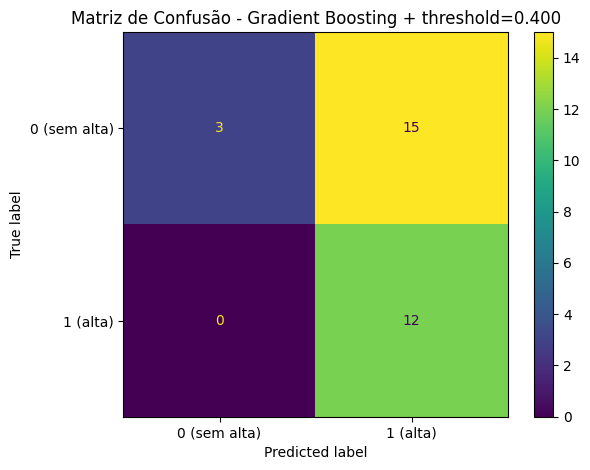

<Figure size 600x500 with 0 Axes>

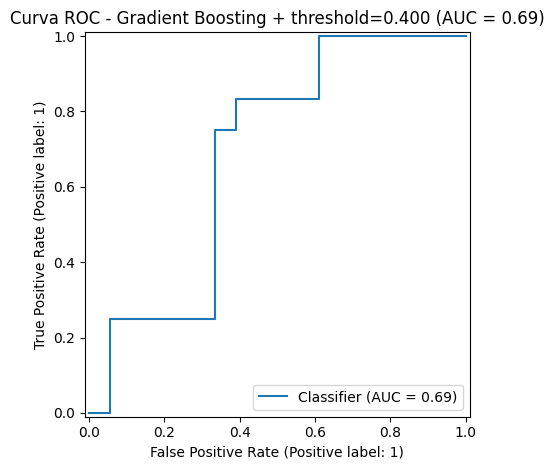

{'modelo': 'Gradient Boosting + threshold=0.400',
 'acuracia': 0.5,
 'auc': np.float64(0.6851851851851852),
 'tn': 3,
 'fp': 15,
 'fn': 0,
 'tp': 12,
 'precision_1': 0.4444444444444444,
 'recall_1': 1.0,
 'f1_1': 0.6153846153846154}

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

# treina no treino2
gb.fit(X_tr2, y_tr2)

# escolhe threshold na validação
t_gb, acc_val_gb = melhor_threshold_por_accuracy(gb, X_val, y_val)
print("GB - threshold escolhido:", t_gb, " | acc_val:", acc_val_gb)

# avalia no teste usando sua função
gb_thr = ThresholdedEstimator(gb, threshold=t_gb)

resultados = []
avaliar_modelo(
    gb_thr,
    f"Gradient Boosting + threshold={t_gb:.3f}",
    X_train, y_train,
    X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=False
)


In [93]:
# Ajuste rápido: procurar threshold mais conservador (só 1 linha muda)
t_gb, acc_val_gb = melhor_threshold_por_accuracy(
    gb, X_val, y_val,
    t_min=0.40, t_max=0.95, steps=111
)
print("GB - threshold escolhido:", t_gb, "| acc_val:", acc_val_gb)


GB - threshold escolhido: 0.49 | acc_val: 0.8666666666666667


In [94]:
# Melhor ajuste: usar validação colada no teste (val_size = 30)

val_size = 30

X_tr2 = X_train.iloc[:-val_size]
y_tr2 = y_train.iloc[:-val_size]
X_val = X_train.iloc[-val_size:]
y_val = y_train.iloc[-val_size:]


In [95]:
# O ajuste “mais correto”: escolher threshold por TimeSeriesSplit (robusto)
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

def melhor_threshold_por_tscv(modelo, X, y, n_splits=5, t_min=0.40, t_max=0.95, steps=111):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    thresholds = np.linspace(t_min, t_max, steps)
    acc_por_t = np.zeros(len(thresholds))

    for tr_idx, val_idx in tscv.split(X):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[val_idx]

        modelo.fit(X_tr, y_tr)
        proba = modelo.predict_proba(X_va)[:, 1]

        for i, t in enumerate(thresholds):
            pred = (proba >= t).astype(int)
            # ignora thresholds que viram tudo 0 ou tudo 1
            if pred.min() == pred.max():
                continue
            acc_por_t[i] += accuracy_score(y_va, pred)

    best_i = int(np.argmax(acc_por_t))
    return thresholds[best_i], acc_por_t[best_i] / n_splits

gb = GradientBoostingClassifier(random_state=42)

best_t, acc_cv = melhor_threshold_por_tscv(gb, X_train, y_train, n_splits=5)
print("Threshold escolhido via TS-CV:", best_t)
print("Acurácia média na validação (TS-CV):", acc_cv)

# Treina no treino todo e avalia no teste
gb.fit(X_train, y_train)
proba_test = gb.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= best_t).astype(int)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Acurácia (teste):", accuracy_score(y_test, y_pred_test))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, zero_division=0))


Threshold escolhido via TS-CV: 0.4
Acurácia média na validação (TS-CV): 0.5050473186119874
Acurácia (teste): 0.5
Matriz de confusão:
 [[ 3 15]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        18
           1       0.44      1.00      0.62        12

    accuracy                           0.50        30
   macro avg       0.72      0.58      0.45        30
weighted avg       0.78      0.50      0.42        30



## **Tuning** do SVC (RBF) com validação temporal e ajuste de threshold

## Objetivo
Melhorar a acurácia do modelo **SVC com kernel RBF** para prever a tendência (classe 0/1), respeitando a natureza temporal dos dados (sem “vazar futuro”).

---

## 1) Pipeline do modelo
Foi criado um **Pipeline** com duas etapas:

1. `StandardScaler()`
   - Padroniza as features (média 0, desvio 1).
   - É essencial para SVC, porque SVM é sensível à escala.

2. `SVC(kernel="rbf", probability=True)`
   - `kernel="rbf"`: permite fronteiras não lineares.
   - `probability=True`: habilita `predict_proba()` para ajustar threshold depois.

---

## 2) Validação cruzada para séries temporais (TimeSeriesSplit)
Em vez de usar K-Fold aleatório, foi usado:

- `TimeSeriesSplit(n_splits=5)`

Isso garante:
- Treino sempre com dados “anteriores”
- Validação sempre com dados “posteriores”
- Evita olhar o futuro sem querer (o erro clássico em dados temporais)

---

## 3) Busca de hiperparâmetros (GridSearchCV)
Foi executado um `GridSearchCV` para testar combinações de parâmetros do SVC:

- `C`: controla o quanto o modelo “aceita erro” vs. tenta separar as classes ao máximo  
  (C alto = mais rígido; C baixo = mais tolerante)

- `gamma`: controla o alcance/influência dos pontos no kernel RBF  
  (gamma alto = decisões mais locais; gamma baixo = decisões mais suaves)

- `class_weight`: trata possível desbalanceamento
  - `None` (sem balanceamento)
  - `"balanced"` (peso automático inverso à frequência)

O GridSearch:
- treina várias combinações usando TimeSeriesSplit
- escolhe a melhor pelo critério `scoring="accuracy"`

Saídas importantes:
- `grid.best_params_` → parâmetros vencedores
- `grid.best_score_` → melhor acurácia média nas validações temporais

---

## 4) Ajuste de threshold (em vez de usar 0,5 fixo)
Depois de achar o melhor SVC, foi feito um passo extra:

1. Separar uma validação final do treino (ex.: últimos 60 dias do treino)
   - `X_tr2, y_tr2` = parte inicial do treino
   - `X_val, y_val` = parte final do treino (mais recente)

2. Treinar no `X_tr2` e prever probabilidade na validação (`X_val`)

3. Testar vários thresholds (ex.: de 0.2 a 0.8)
   - para cada threshold `t`, a regra vira:
     - classe 1 se `proba >= t`
     - classe 0 caso contrário

4. Escolher o threshold que dá **maior acurácia na validação**
   - Resultado: `best_t`

Por que isso ajuda?
- `predict()` usa threshold “padrão” (aprox. 0,5)
- Em séries financeiras, um threshold diferente pode dar alguns acertos a mais — e em 30 dias isso pode ser a diferença entre 66% e 75%.

---

## 5) Avaliação final (teste oficial)
Com os parâmetros e threshold definidos sem olhar o teste:

1. Treinar o melhor SVC no `X_train` inteiro
2. Obter `predict_proba()` no `X_test`
3. Aplicar `best_t` para gerar `y_pred_test`
4. Medir:
   - `accuracy_score`
   - `confusion_matrix`
   - `classification_report`

---

## Em resumo (o “pulo do gato”)
- **TimeSeriesSplit** evita vazamento temporal
- **GridSearchCV** ajusta `C`, `gamma` e `class_weight`
- **Threshold tuning** tenta extrair os últimos pontos de acurácia sem trapacear no teste


Melhores parâmetros: {'clf__C': 50, 'clf__gamma': 0.01}
Melhor score (CV treino): 0.5078864353312302

===== SVC Tunado (TimeSeriesSplit) =====
Acurácia: 0.6

Matriz de confusão:
 [[18  0]
 [12  0]]

Relatório:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00        12

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.38        30
weighted avg       0.36      0.60      0.45        30



<Figure size 600x500 with 0 Axes>

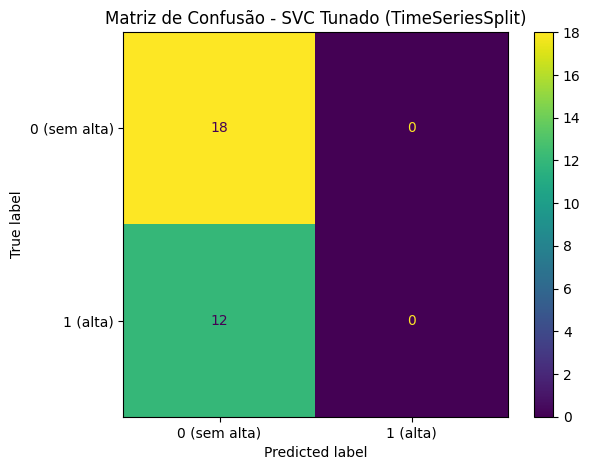

<Figure size 600x500 with 0 Axes>

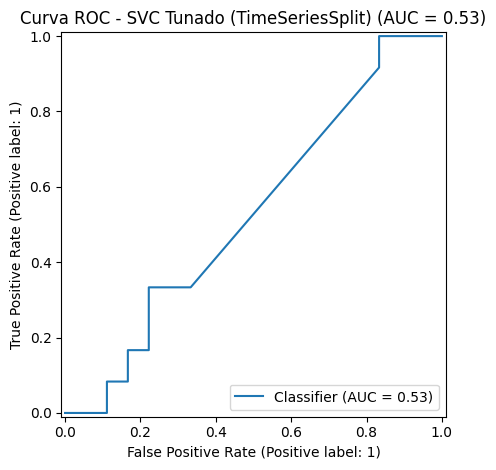


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
2        retorno_7d           0.030000         0.020817
1        retorno_3d           0.010000         0.015275
5   volatilidade_3d           0.001667         0.007265
10        macd_diff           0.001667         0.012802
0        retorno_1d           0.000000         0.000000
4     media_movel_7           0.000000         0.000000
3     media_movel_3           0.000000         0.000000
6   volatilidade_7d           0.000000         0.000000
7            rsi_14           0.000000         0.000000
8              macd           0.000000         0.000000


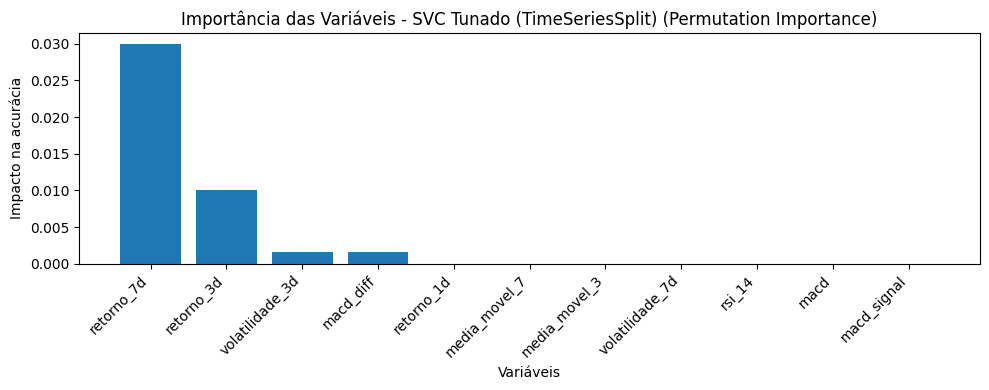

In [56]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

tscv = TimeSeriesSplit(n_splits=5)

svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced"))
])

param_grid = {
    "clf__C": [0.1, 1, 5, 10, 50, 100],
    "clf__gamma": ["scale", 0.01, 0.05, 0.1, 0.2, 0.5]
}

grid = GridSearchCV(
    svc_pipe,
    param_grid=param_grid,
    cv=tscv,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor score (CV treino):", grid.best_score_)

# Avaliar o melhor modelo no seu teste oficial (últimos 30 pregões)
best_svc = grid.best_estimator_

resultado_best_svc = avaliar_modelo(
    best_svc, "SVC Tunado (TimeSeriesSplit)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)


In [57]:
# BLOCO 1 — função auxiliar (cola uma vez, antes do tuning)

def tail_split(X, y, val_size):
    """
    Divide treino em (treino2 + validação final) sem quebrar
    se X/y forem pandas (tem .iloc) ou numpy (sem .iloc).
    """
    n = len(X)
    val_size = min(val_size, n - 1)  # evita treino vazio

    if hasattr(X, "iloc"):
        X_tr2 = X.iloc[:-val_size]
        X_val = X.iloc[-val_size:]
        y_tr2 = y.iloc[:-val_size]
        y_val = y.iloc[-val_size:]
    else:
        X_tr2 = X[:-val_size]
        X_val = X[-val_size:]
        y_tr2 = y[:-val_size]
        y_val = y[-val_size:]

    return X_tr2, X_val, y_tr2, y_val


In [58]:
# BLOCO 2 — TimeSeriesSplit mais “seguro” (substitui o seu)

tscv = TimeSeriesSplit(n_splits=3)


In [59]:
# BLOCO 3 — val_size + split corrigido (substitui seu trecho do iloc)

# Ajuste automático do tamanho da validação:
# - 20% do treino ou 60 (o que for menor)
# - mínimo 10 (pra não ficar ridículo)
val_size = min(60, len(X_train)//5)
val_size = max(val_size, 10)

X_tr2, X_val, y_tr2, y_val = tail_split(X_train, y_train, val_size)


In [60]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def tail_split(X, y, val_size):
    n = len(X)
    val_size = min(val_size, n - 1)
    if hasattr(X, "iloc"):
        return X.iloc[:-val_size], X.iloc[-val_size:], y.iloc[:-val_size], y.iloc[-val_size:]
    else:
        return X[:-val_size], X[-val_size:], y[:-val_size], y[-val_size:]

# 1) GridSearch com validação temporal (mais seguro)
tscv = TimeSeriesSplit(n_splits=3)

svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=True))
])

param_grid = {
    "clf__C": [0.1, 1, 5, 10, 50, 100, 300, 1000],
    "clf__gamma": ["scale", 0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
    "clf__class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    svc_pipe,
    param_grid=param_grid,
    cv=tscv,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor score (CV treino):", grid.best_score_)

best_svc = grid.best_estimator_

# 2) Ajuste de threshold (val_size automático)
val_size = min(60, len(X_train)//5)
val_size = max(val_size, 10)

X_tr2, X_val, y_tr2, y_val = tail_split(X_train, y_train, val_size)

best_svc.fit(X_tr2, y_tr2)
proba_val = best_svc.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.2, 0.8, 121)
accs = []
for t in thresholds:
    pred_val = (proba_val >= t).astype(int)
    accs.append(accuracy_score(y_val, pred_val))

best_t = thresholds[int(np.argmax(accs))]
print("Melhor threshold (val):", best_t)
print("Accuracy na validação com threshold:", max(accs))

# 3) Avaliação final no teste oficial
best_svc.fit(X_train, y_train)
proba_test = best_svc.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= best_t).astype(int)

print("\nAcurácia (teste):", accuracy_score(y_test, y_pred_test))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred_test))
print("\nRelatório:\n", classification_report(y_test, y_pred_test, zero_division=0))


Melhores parâmetros: {'clf__C': 1, 'clf__class_weight': None, 'clf__gamma': 0.001}
Melhor score (CV treino): 0.5239096163951655
Melhor threshold (val): 0.2
Accuracy na validação com threshold: 0.55

Acurácia (teste): 0.4

Matriz de confusão:
 [[ 0 18]
 [ 0 12]]

Relatório:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.40      1.00      0.57        12

    accuracy                           0.40        30
   macro avg       0.20      0.50      0.29        30
weighted avg       0.16      0.40      0.23        30



In [61]:
import numpy as np
from sklearn.metrics import accuracy_score

# Baseline no teste (maioria)
baseline = max((y_test==0).mean(), (y_test==1).mean())
print("Baseline (maioria) no teste:", baseline)

# Olhar distribuição das probabilidades
proba_test = best_svc.predict_proba(X_test)[:, 1]
print("Probabilidades (teste) - min/25%/50%/75%/max:",
      np.min(proba_test),
      np.percentile(proba_test, 25),
      np.percentile(proba_test, 50),
      np.percentile(proba_test, 75),
      np.max(proba_test))


Baseline (maioria) no teste: 0.6
Probabilidades (teste) - min/25%/50%/75%/max: 0.5206648055776698 0.5209640563398472 0.5210630644213629 0.5212617133767508 0.5214917604889524


In [62]:
import numpy as np
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0.01, 0.99, 199)

best_t = None
best_acc = -1

proba_val = best_svc.predict_proba(X_val)[:, 1]

for t in thresholds:
    pred = (proba_val >= t).astype(int)

    # Regra: ignora thresholds que viram tudo 0 ou tudo 1
    if pred.min() == pred.max():
        continue

    acc = accuracy_score(y_val, pred)
    if acc > best_acc:
        best_acc = acc
        best_t = t

print("Melhor threshold (val) com restrição:", best_t)
print("Accuracy na validação:", best_acc)


Melhor threshold (val) com restrição: None
Accuracy na validação: -1


In [1]:
proba_test = best_svc.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= best_t).astype(int)

print("Acurácia (teste):", accuracy_score(y_test, y_pred_test))


NameError: name 'best_svc' is not defined

In [ ]:
proba_test = best_svc.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= best_t).astype(int)

print("Acurácia (teste):", accuracy_score(y_test, y_pred_test))


In [ ]:
val_size = 30
X_tr2, X_val, y_tr2, y_val = tail_split(X_train, y_train, val_size)

best_svc.fit(X_tr2, y_tr2)
